<div style="
           display:fill;
           border-radius:30px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#373737;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h1 class="title" style="font-size:80px; text-align: center;padding: 5px; color:#00BFFF;">
            <span style="
                margin-right: -5px;
                transition: 0.4s;
                     "
              onMouseOver="this.style.fontSize = '1.5em'" onMouseOut= "this.style.fontSize = '1em'">C</span>
            <span style="
                margin-right: -5px;
                transition: 0.4s;
                     "
              onMouseOver="this.style.fontSize = '1.5em'" onMouseOut= "this.style.fontSize = '1em'">u</span>
            <span style="
                margin-right: -5px;
                transition: 0.4s;
                     "
              onMouseOver="this.style.fontSize = '1.5em'" onMouseOut= "this.style.fontSize = '1em'">s</span>
            <span style="
                margin-right: -5px;
                transition: 0.4s;
                     "
              onMouseOver="this.style.fontSize = '1.5em'" onMouseOut= "this.style.fontSize = '1em'">t</span>
            <span style="
                margin-right: -5px;
                transition: 0.4s;
                     "
              onMouseOver="this.style.fontSize = '1.5em'" onMouseOut= "this.style.fontSize = '1em'">o</span>
            <span style="
                margin-right: -5px;
                transition: 0.4s;
                     "
              onMouseOver="this.style.fontSize = '1.5em'" onMouseOut= "this.style.fontSize = '1em'">m</span>
            <span style="
                margin-right: -5px;
                transition: 0.4s;
                     "
              onMouseOver="this.style.fontSize = '1.5em'" onMouseOut= "this.style.fontSize = '1em'">e</span>
        <span style="
                margin-right: -5px;
                transition: 0.4s;
                     "
              onMouseOver="this.style.fontSize = '1.5em'" onMouseOut= "this.style.fontSize = '1em'">r</span>
        <span style="
                margin-right: -5px;
                transition: 0.4s;
                     "
              onMouseOver="this.style.fontSize = '1.5em'" onMouseOut= "this.style.fontSize = '1em'">🙂</span>
        </h1>
</div>

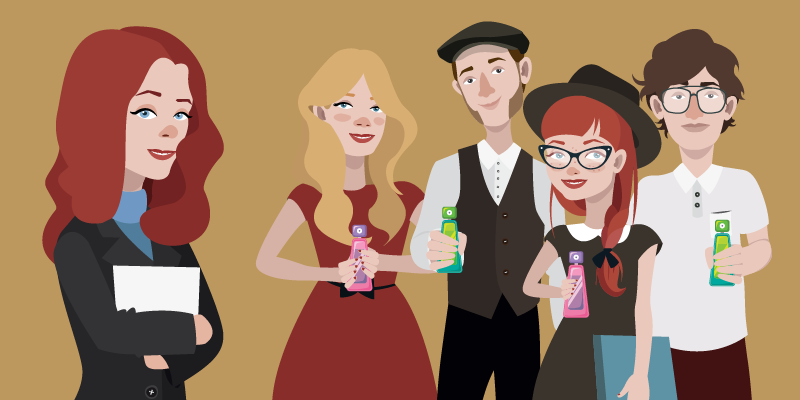

- [Introduction](#intro)
- [Data Wrangling](#wrang)
- [Data Cleaning](#cleaning)
- [Data Exploratory](#exp)
     - [1.Correlation among all features](#corr)
     - [2.what is the special features of the wines buyers ?](#wine)
     - [3.Who consume healthy food  ?](#healthy)
     - [4.Does The Income of the customers and the Total Spent by Cusomters depend on the Education Status ?](#income)
     

<a id='intro'></a>

### Context



>Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Content

#### People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

#### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

<a id='wrang'></a>
# Data Wrangling

In [1]:
# import the libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
# Read the csv file am gonna work with :

df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


<a id='cleaning'></a>
# Data Cleaning

In [5]:
# make a copy of the dataframe to aviod any problem 
data = df.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### From the above output, I can conclude that :
- Income column has missing values.
- Dt_Customer has wrong data type, it should be a date time.

### First: checking for missing values and remove them :

In [7]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# Remove the NA values 
data = data.dropna(how='any') 

### Second: Change the dtype of Dt_customer column to date time:

In [9]:
# change the dtype of DT_Customer column to date time :
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [10]:
# replace uppercase to lowercase 
data.rename(columns=lambda x: x.lower(), inplace=True)

### Next step :
- Extract the **Age** of the customer from the Year_birth column.
- Create **Age Range** from the age of the customer.
- Add a **Total_Spent** column indicating all the customer has spent in all categories in the last two years.
- Create another column **Living with** extract it from the martial_status column.
- Create another column **Childern** to indicate total childern from kidhome and teenhome.
- Create a **Family_Size** column to know the number of every famliy.
- Create a feature **Is_Parent** to indicate parenthood status
- Lastly, I will create three categories in the "Education" by simplifying its value counts.
- Rename and drop some columns.

In [11]:
# add age of the customer today :
data['age'] = 2022 - data['year_birth']

In [12]:
# add age_range column
bins= [0,13,21,40,90]
labels = ['Child','Teens','Adult','Old']
data['age_range'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

In [13]:
# add total_spent column:
data['total_spent'] = data['mntwines'] + data['mntfruits'] + data['mntmeatproducts'] + data['mntfishproducts'] + data['mntsweetproducts'] + data['mntgoldprods']

In [14]:
# Create a living_with column:
data['living_with'] = data['marital_status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [15]:
# create a childern column:
data['children'] = data['kidhome'] + data['teenhome']

In [16]:
# Create a Family_size column:
data["Family_Size"] = data["living_with"].replace({"Alone": 1, "Partner":2})+ data["children"]

In [17]:
#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.children> 0, 1, 0)

In [18]:
# Create a education_status column:
data['education_status'] = data['education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate','Graduation':'Graduate','Master':'Postgraduate','PhD':'Postgraduate'})

In [19]:
# Changing some columns names :
data = data.rename(columns={"mntwines": "wines","mntfruits":"fruits","mntmeatproducts":"meat","mntfishproducts":"fish"
                          ,"mntsweetproducts":"sweets","mntgoldprods":"gold"})

In [20]:
# Dropping some of the unwanted features:
to_drop = ["marital_status", "dt_customer", "z_costcontact", "z_revenue", "year_birth", "id"] 
data = data.drop(to_drop , axis = 1)

In [21]:
data.head()

,education,income,kidhome,teenhome,recency,wines,fruits,meat,fish,sweets,gold,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,age_range,total_spent,living_with,children,Family_Size,Is_Parent,education_status
0,Graduation,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,Old,1617,Alone,0,1,0,Graduate
1,Graduation,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,Old,27,Alone,2,3,1,Graduate
2,Graduation,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,Old,776,Partner,0,2,0,Graduate
3,Graduation,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38,Adult,53,Partner,1,3,1,Graduate
4,PhD,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41,Old,422,Partner,1,3,1,Postgraduate


In [22]:
data.describe()

,income,kidhome,teenhome,recency,wines,fruits,meat,fish,sweets,gold,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,total_spent,children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,53.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,129.000000,2525.000000,3.000000,5.000000,1.000000


<a id='exp'></a>
# Data Exploratory 

In [23]:
data.head()

,education,income,kidhome,teenhome,recency,wines,fruits,meat,fish,sweets,gold,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,age_range,total_spent,living_with,children,Family_Size,Is_Parent,education_status
0,Graduation,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,Old,1617,Alone,0,1,0,Graduate
1,Graduation,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,Old,27,Alone,2,3,1,Graduate
2,Graduation,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,Old,776,Partner,0,2,0,Graduate
3,Graduation,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38,Adult,53,Partner,1,3,1,Graduate
4,PhD,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41,Old,422,Partner,1,3,1,Postgraduate


<Figure size 432x288 with 0 Axes>

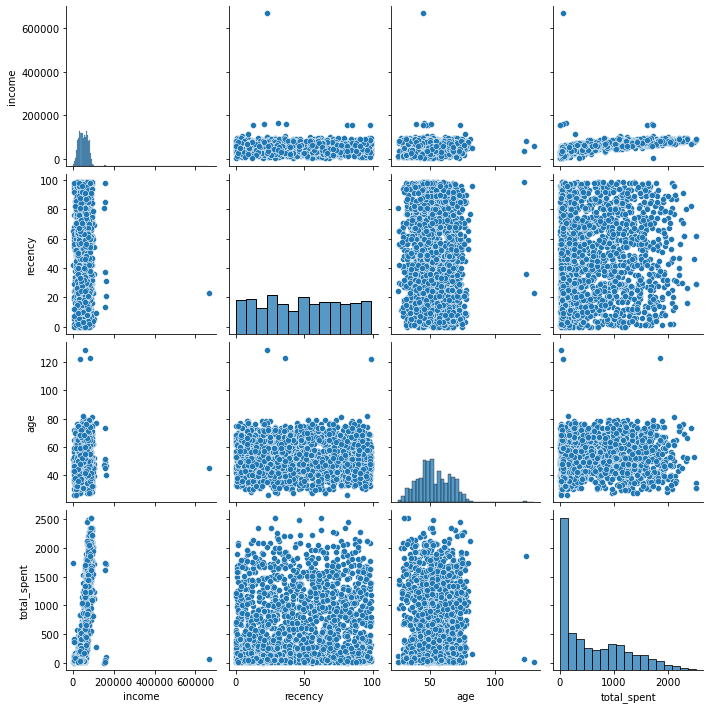

In [24]:
#Plotting following features
To_Plot = [ "income", "recency", "age", "total_spent"]
plt.figure()
sns.pairplot(data[To_Plot], palette = (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

> Clearly, there are a few outliers in the Income and Age features. I will be deleting the outliers in the data.



In [25]:
# Dropping the outliers by setting a cap on Age and income. 

data = data[(data["age"]<90)]
data = data[(data["income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


<a id='corr'></a>

# Correlation among all features 

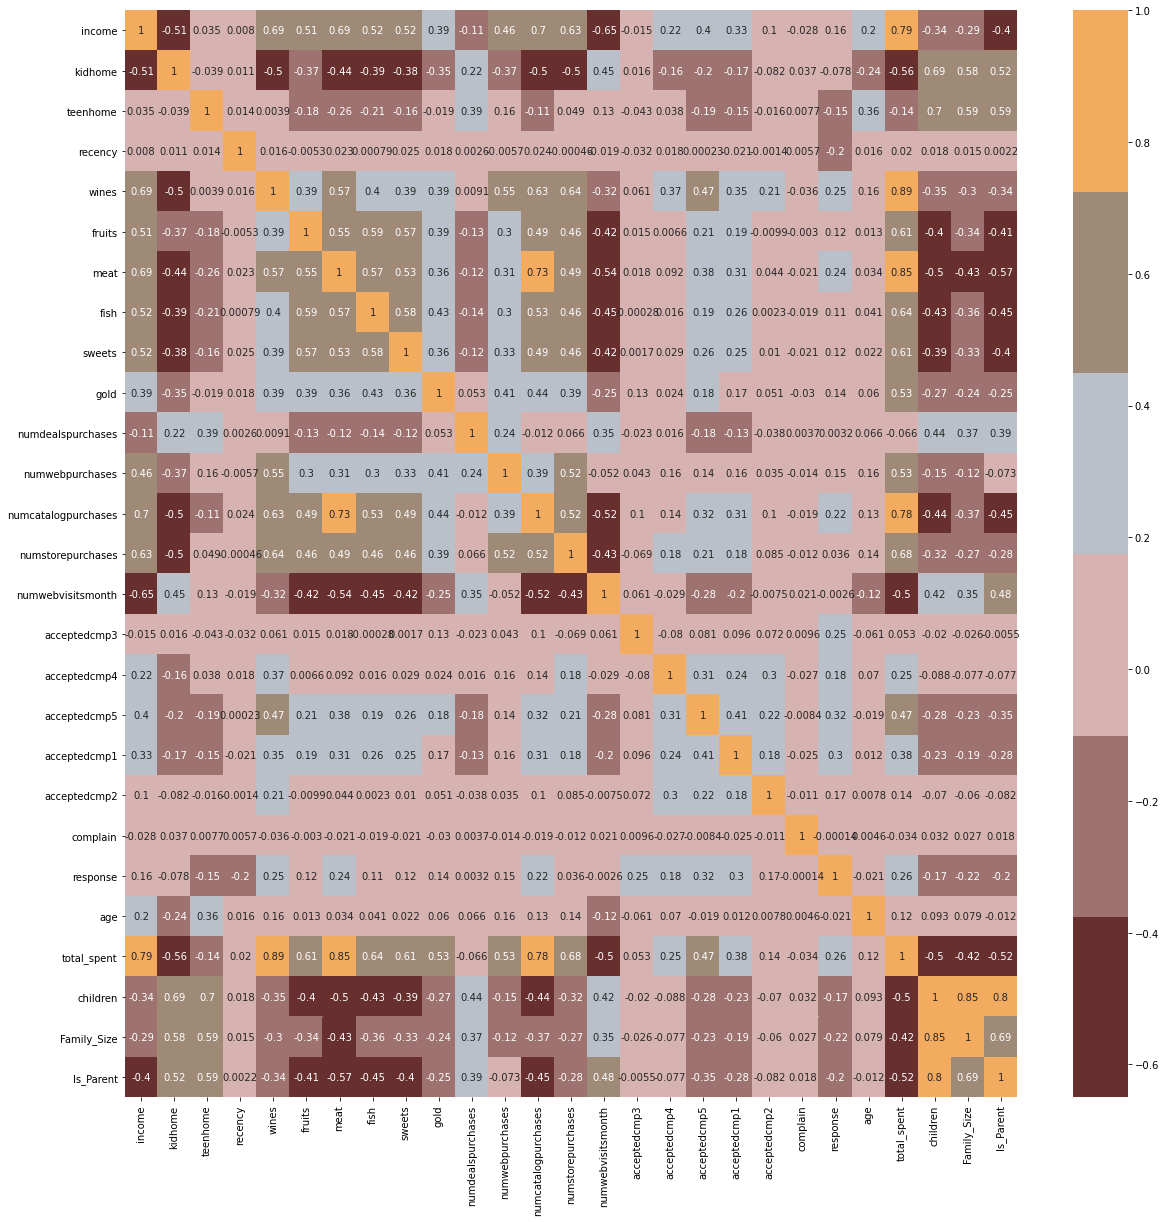

In [26]:
# lets see the correlation between the features:

cmap =(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

plt.figure(figsize=(20,20))  
corr = data.corr()
sns.heatmap(corr, annot= True, cmap= cmap)
plt.show()

- The income has **perfect positive** correlation with all features(1).
- Childern with total spent has **a moderate negative** relationship (-0.5).
- Total spent is highly correlated with **Income , Wines & Meat**. 

<a id='wine'></a>

# What is the special features of the wines buyers ?

In [28]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]

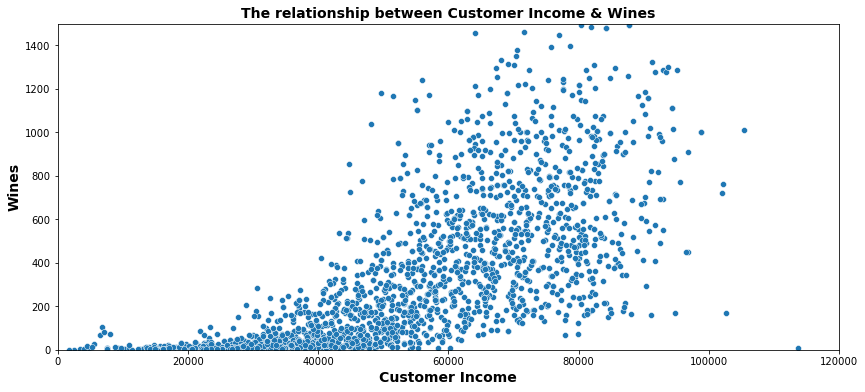

In [29]:
plt.figure(figsize=(14,6))

g = sns.scatterplot(data = data , x = 'income' , y = 'wines')


#axes labels and title
plt.xlabel('Customer Income',fontsize = 14, weight = "bold")
plt.ylabel('Wines', fontsize = 14, weight = "bold")
plt.title('The relationship between Customer Income & Wines', fontsize= 14, weight = 'bold')

g.set_xlim(0,120000)
g.set_ylim(0,1500)

plt.show()

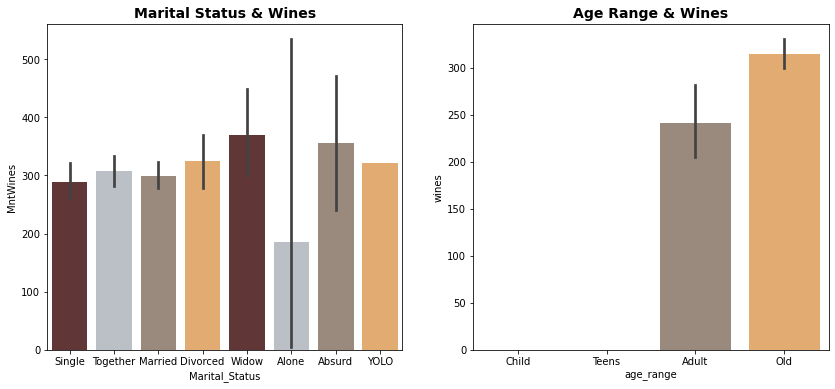

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set_title('Marital Status & Wines', fontsize= 14, weight = 'bold')
sns.barplot(data = df , x ='Marital_Status', y = 'MntWines',palette = pal, ax = ax1)

sns.barplot(data = data , x ='age_range', y = 'wines', palette = pal, ax = ax2)
ax2.set_title('Age Range & Wines', fontsize= 14, weight = 'bold')

plt.show()

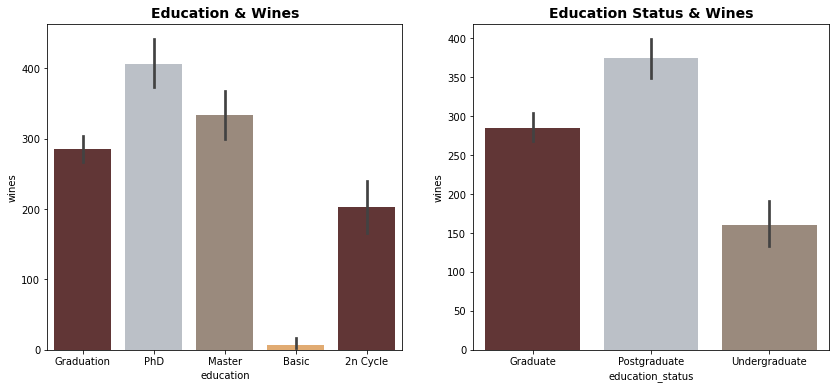

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data = data, x = 'education', y = 'wines',palette=pal, ax = ax1)
ax1.set_title('Education & Wines', fontsize= 14, weight = 'bold')

sns.barplot(data = data, x = 'education_status', y = 'wines',palette = pal, ax= ax2)
ax2.set_title('Education Status & Wines', fontsize= 14, weight = 'bold')

plt.show()

Deduction of Analysis :
- There is a relationship between the Customer Income and The Wines, the more the income of the customer increased the wines sales also increased.
- From the Marital Status of the customer the **Widow , Divorced & Absurd** are the ones who buy wines more.
- The Customers that **is older than 30** are the more who buy wines.
- **Postgraduate ( PhD and Master )** Customers are the most buyers of wines.

<a id='healthy'></a>

# Who consume healthy food  ?

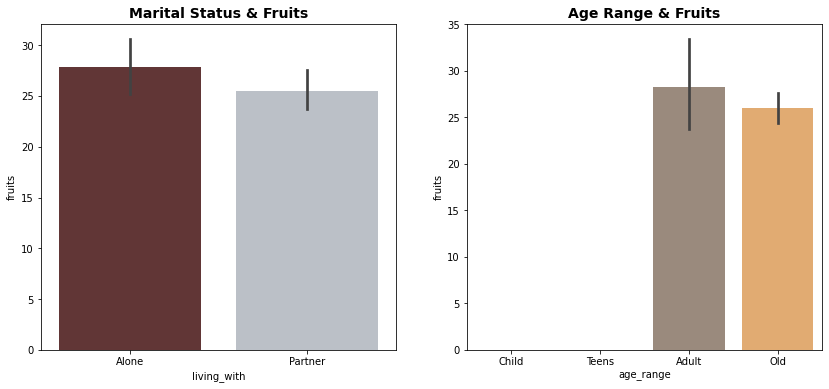

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set_title('Marital Status & Fruits', fontsize= 14, weight = 'bold')
sns.barplot(data = data , x ='living_with', y = 'fruits',palette = pal, ax = ax1)

sns.barplot(data = data , x ='age_range', y = 'fruits', palette = pal, ax = ax2)
ax2.set_title('Age Range & Fruits', fontsize= 14, weight = 'bold')

plt.show()

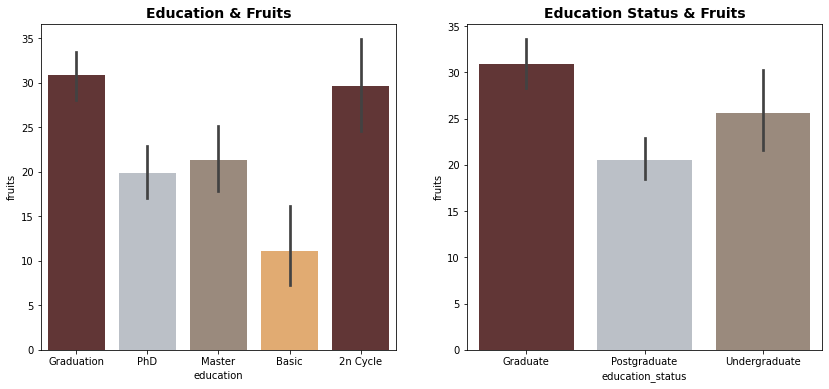

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data = data, x = 'education', y = 'fruits',palette=pal, ax = ax1)
ax1.set_title('Education & Fruits', fontsize= 14, weight = 'bold')

sns.barplot(data = data, x = 'education_status', y = 'fruits',palette = pal, ax= ax2)
ax2.set_title('Education Status & Fruits', fontsize= 14, weight = 'bold')

plt.show()

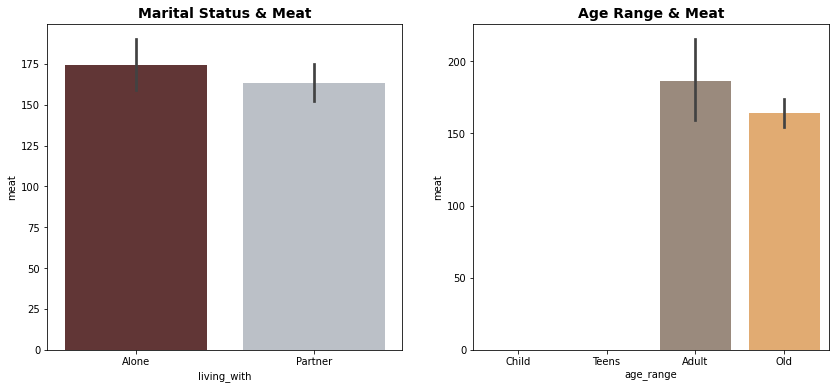

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set_title('Marital Status & Meat', fontsize= 14, weight = 'bold')
sns.barplot(data = data , x ='living_with', y = 'meat',palette = pal, ax = ax1)

sns.barplot(data = data , x ='age_range', y = 'meat', palette = pal, ax = ax2)
ax2.set_title('Age Range & Meat', fontsize= 14, weight = 'bold')

plt.show()

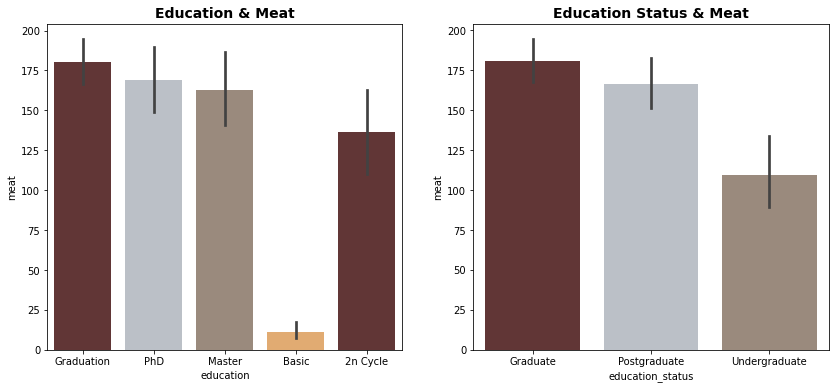

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data = data, x = 'education', y = 'meat',palette=pal, ax = ax1)
ax1.set_title('Education & Meat', fontsize= 14, weight = 'bold')

sns.barplot(data = data, x = 'education_status', y = 'meat',palette = pal, ax= ax2)
ax2.set_title('Education Status & Meat', fontsize= 14, weight = 'bold')

plt.show()

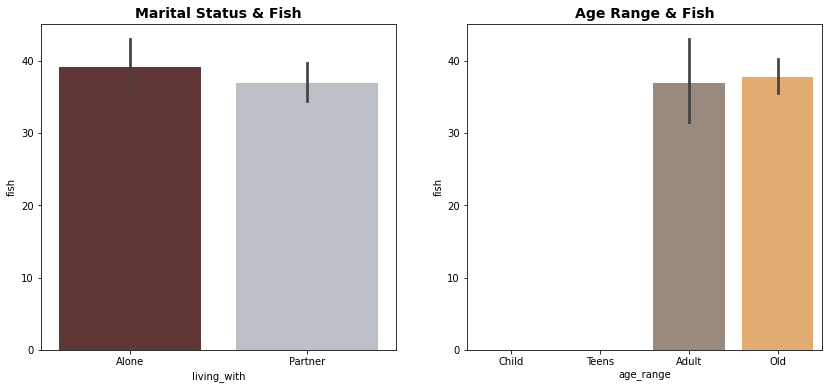

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set_title('Marital Status & Fish', fontsize= 14, weight = 'bold')
sns.barplot(data = data , x ='living_with', y = 'fish',palette = pal, ax = ax1)

sns.barplot(data = data , x ='age_range', y = 'fish', palette = pal, ax = ax2)
ax2.set_title('Age Range & Fish', fontsize= 14, weight = 'bold')

plt.show()

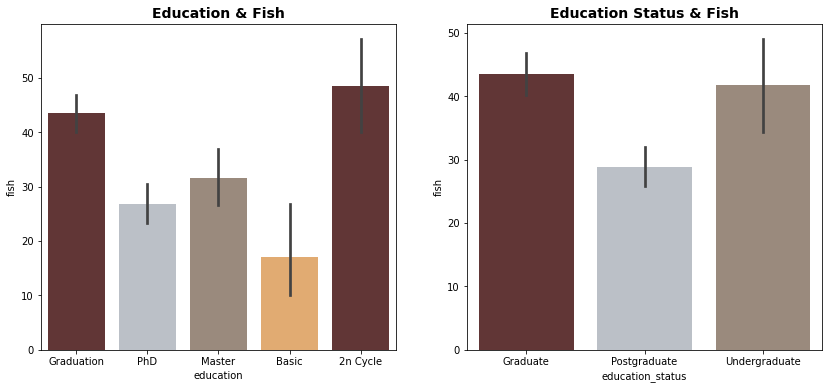

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data = data, x = 'education', y = 'fish',palette=pal, ax = ax1)
ax1.set_title('Education & Fish', fontsize= 14, weight = 'bold')

sns.barplot(data = data, x = 'education_status', y = 'fish',palette = pal, ax= ax2)
ax2.set_title('Education Status & Fish', fontsize= 14, weight = 'bold')

plt.show()

Duduction of the Analysis:
- The Healthy food has no relationship with marital status of the customers.
- **Fruits & Meat** are more consumed from the customers bweteen 20 to 40 years old.
- **Fish** is more consumed from the customers older than 40.
- **Postgraduate** with **Fruits and Fish** is the least consumed maybe because they consume wine more.

In [38]:
data.head()

,education,income,kidhome,teenhome,recency,wines,fruits,meat,fish,sweets,gold,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,age_range,total_spent,living_with,children,Family_Size,Is_Parent,education_status
0,Graduation,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,Old,1617,Alone,0,1,0,Graduate
1,Graduation,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,Old,27,Alone,2,3,1,Graduate
2,Graduation,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,Old,776,Partner,0,2,0,Graduate
3,Graduation,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38,Adult,53,Partner,1,3,1,Graduate
4,PhD,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41,Old,422,Partner,1,3,1,Postgraduate


<a id='income'></a>

# Does The Income of the customers and the Total Spent by Cusomters depend on the Education Status ?

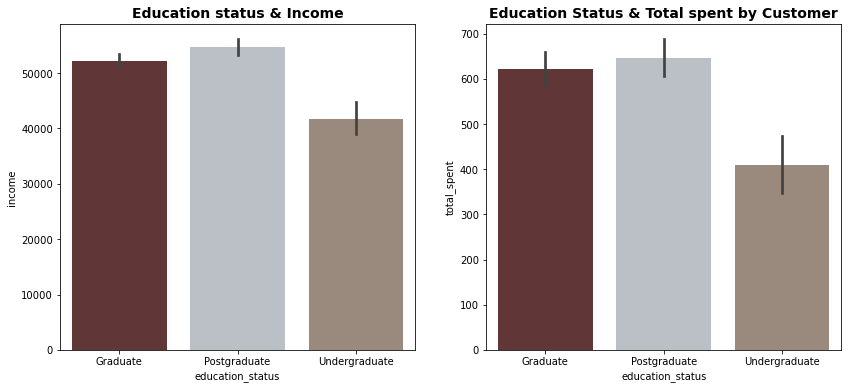

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data = data, x = 'education_status', y = 'income',palette=pal, ax = ax1)
ax1.set_title('Education status & Income', fontsize= 14, weight = 'bold')

sns.barplot(data = data, x = 'education_status', y = 'total_spent',palette = pal, ax= ax2)
ax2.set_title('Education Status & Total spent by Customer', fontsize= 14, weight = 'bold')

plt.show()

> Yes, The Income of the customers and the Total Spent by Cusomters depend on the Education Status:
The Customer with Postgraduate is the ones who have more income and spend more money.